# EE590 Basics of Data Analysis and Machine Learning 
# Assignment #4: Data Analysis and Modeling on Health Insurance Dataset

## Zachary Chou

## Fall 2023

# Load Data Into DataFrame

In [1]:
# Import libraries numpy, pandas, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.stats import norm

In [2]:
# Read the csv file: "insurance.csv"
df = pd.read_csv('insurance.csv')

print(df.to_string()) 

       Age  Gender   BMI  Children Smoker     Region  Expenses
0     19.0  female  27.9         0    yes  southwest  16884.92
1     18.0    male  33.8         1     no  southeast   1725.55
2     28.0    male  33.0         3     no  southeast   4449.46
3     33.0    male  22.7         0     no  northwest  21984.47
4     32.0    male  28.9         0     no  northwest   3866.86
5     31.0  female  25.7         0     no  southeast   3756.62
6     46.0  female  33.4         1     no  southeast   8240.59
7     37.0  female  27.7         3     no  northwest   7281.51
8     37.0    male   NaN         2     no  northeast   6406.41
9     60.0  female  25.8         0     no  northwest  28923.14
10    25.0    male  26.2         0     no  northeast   2721.32
11    62.0  female  26.3         0    yes  southeast  27808.73
12    23.0     NaN  34.4         0     no  southwest   1826.84
13    56.0  female  39.8         0     no  southeast  11090.72
14    27.0    male  42.1         0    yes  southeast  3

# Outlier Detection and Removal 

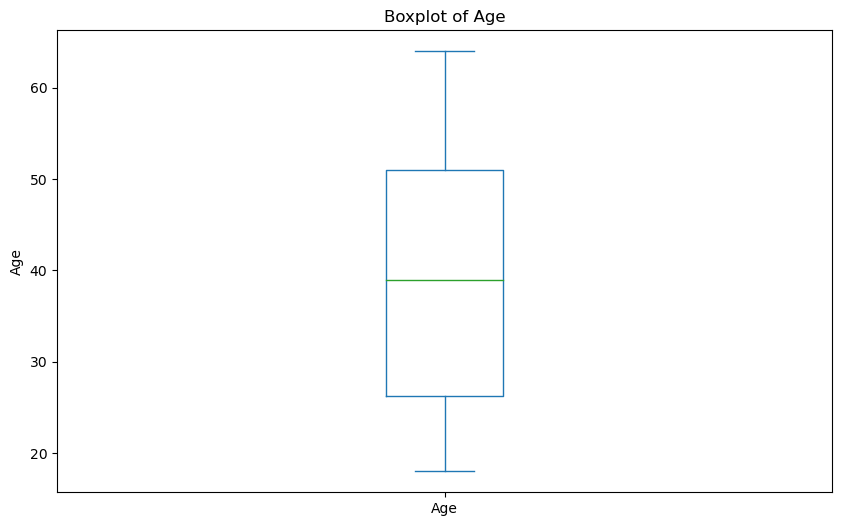

In [3]:
# Boxplot for outliers in Age
plt.figure(figsize=(10,6))
df['Age'].plot(kind='box')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

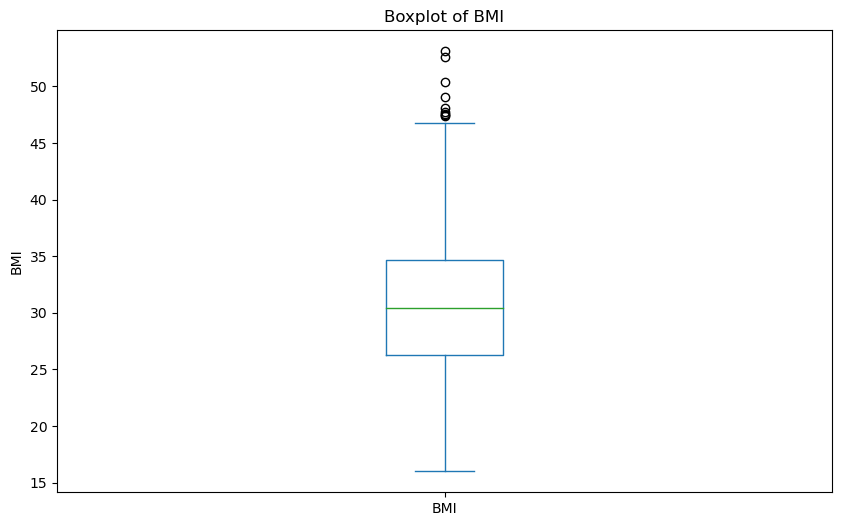

In [4]:
# Boxplot for outliers in BMI
plt.figure(figsize=(10,6))
df['BMI'].plot(kind='box')
plt.title('Boxplot of BMI')
plt.ylabel('BMI')
plt.show()

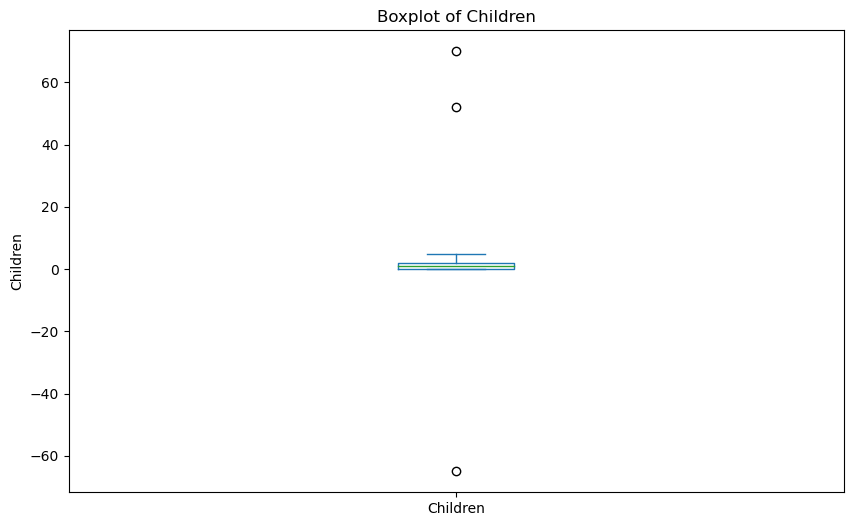

In [5]:
# Boxplot for outliers in Children
plt.figure(figsize=(10,6))
df['Children'].plot(kind='box')
plt.title('Boxplot of Children')
plt.ylabel('Children')
plt.show()

In [6]:
# Calculate Z-scores and remove points where score is greater than 3 - Age
df['Z_Score'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

z_score_threshold = 3.0

outliers = df[abs(df['Z_Score']) > z_score_threshold]

filtered_data = df[abs(df['Z_Score']) <= z_score_threshold]['Age']

print(filtered_data)

# Original length for the Age column is 1338

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: Age, Length: 1334, dtype: float64


In [7]:
# Calculate Z-scores and remove points where score is greater than 3 - BMI
df['Z_Score'] = (df['BMI'] - df['BMI'].mean()) / df['BMI'].std()

z_score_threshold = 3.0

outliers = df[abs(df['Z_Score']) > z_score_threshold]

filtered_data = df[abs(df['Z_Score']) <= z_score_threshold]['BMI']

print(filtered_data)

# Original length for the BMI column is 1338

0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
        ... 
1332    44.7
1333    31.0
1334    31.9
1336    25.8
1337    29.1
Name: BMI, Length: 1326, dtype: float64


In [8]:
# Calculate Z-scores and remove points where score is greater than 3 - Children
df['Z_Score'] = (df['Children'] - df['Children'].mean()) / df['Children'].std()

z_score_threshold = 3.0

outliers = df[abs(df['Z_Score']) > z_score_threshold]

filtered_data = df[abs(df['Z_Score']) <= z_score_threshold]['Children']

print(filtered_data)

# Original length for the Children column is 1338

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: Children, Length: 1335, dtype: int64


# Handling Missing Values 

In [9]:
# Count missing values in each column 
df = df.drop(columns=['Z_Score'])

missing_values = df.isnull().sum()
display(missing_values)

missing_percentage = (missing_values/len(df)*100)
display(missing_percentage)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary)

Age         4
Gender      9
BMI         8
Children    0
Smoker      0
Region      2
Expenses    1
dtype: int64

Age         0.298954
Gender      0.672646
BMI         0.597907
Children    0.000000
Smoker      0.000000
Region      0.149477
Expenses    0.074738
dtype: float64

          Missing Values  Percentage
Age                    4    0.298954
Gender                 9    0.672646
BMI                    8    0.597907
Children               0    0.000000
Smoker                 0    0.000000
Region                 2    0.149477
Expenses               1    0.074738


In [10]:
# Filling the missing data with the mean for all numerical columns 
# This method is used the average can be used to replace 
# missing data for a better overall scope of the columns and 
# respective trend for each numerical column 
mean_Age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_Age)
print("This number will be used to replace any cells that have an empty value under the age column: \n"
      ,mean_Age)

mean_BMI = df['BMI'].mean()
df['BMI'] = df['BMI'].fillna(mean_BMI)
print("This number will be used to replace any cells that have an empty value under the BMI column: \n"
      ,mean_BMI)

mean_Expenses = df['Expenses'].mean()
df['Expenses'] = df['Expenses'].fillna(mean_Expenses)
print("This number will be used to replace any cells that have an empty value under the Expenses column: \n"
      ,mean_Expenses)

This number will be used to replace any cells that have an empty value under the age column: 
 39.176911544227885
This number will be used to replace any cells that have an empty value under the BMI column: 
 30.676917293233085
This number will be used to replace any cells that have an empty value under the Expenses column: 
 13273.30611069559


In [11]:
# Filling the missing data with removal for all categorical columns 
# since this is the most simplest way and there are not as 
# many missing data for categorical columns 
# also to reduce computation time for the linear regression model
df.dropna(subset=['Gender','Region'], inplace=True)

In [12]:
# Updated missing values - all data is filled 
missing_values = df.isnull().sum()
display(missing_values)

missing_percentage = (missing_values/len(df)*100)
display(missing_percentage)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary)

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Expenses    0
dtype: int64

Age         0.0
Gender      0.0
BMI         0.0
Children    0.0
Smoker      0.0
Region      0.0
Expenses    0.0
dtype: float64

          Missing Values  Percentage
Age                    0         0.0
Gender                 0         0.0
BMI                    0         0.0
Children               0         0.0
Smoker                 0         0.0
Region                 0         0.0
Expenses               0         0.0


# Data Distribution Visualization 

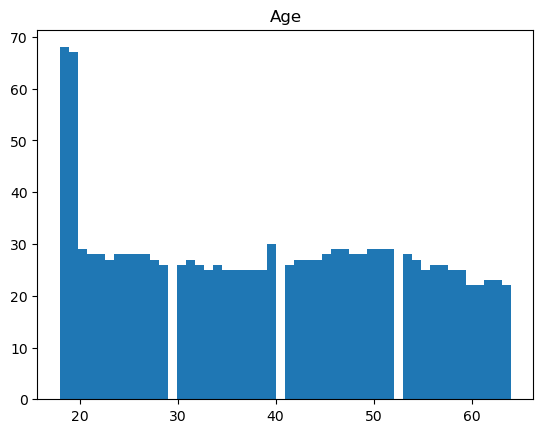

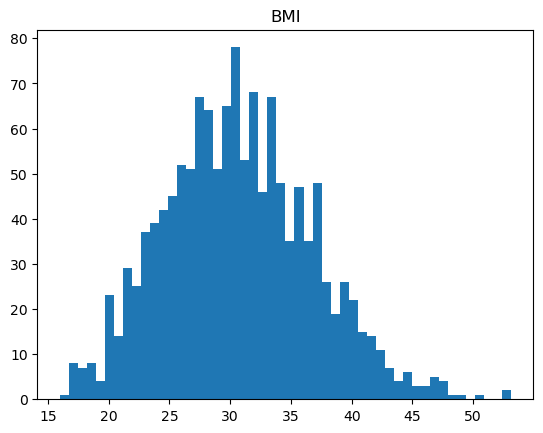

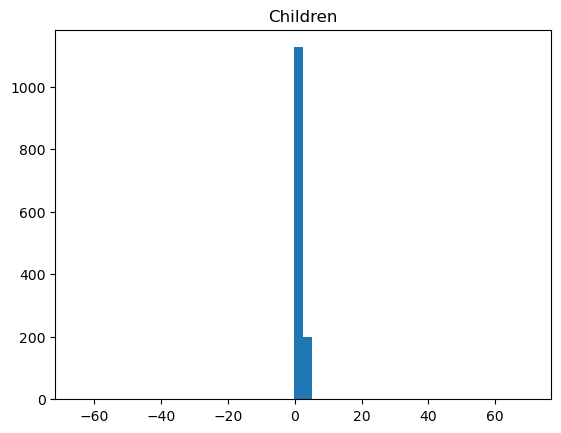

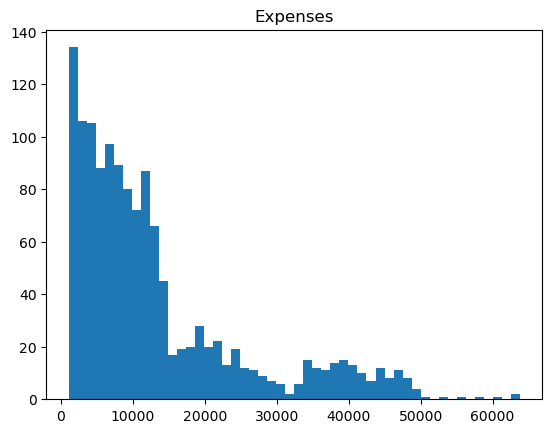

In [13]:
# Histogram for each numerical column
plt.hist(df.Age, bins = 50)
plt.title('Age')
plt.show()

plt.hist(df.BMI, bins = 50)
plt.title('BMI')
plt.show()

plt.hist(df.Children, bins = 50)
plt.title('Children')
plt.show()

plt.hist(df.Expenses, bins = 50)
plt.title('Expenses')
plt.show()

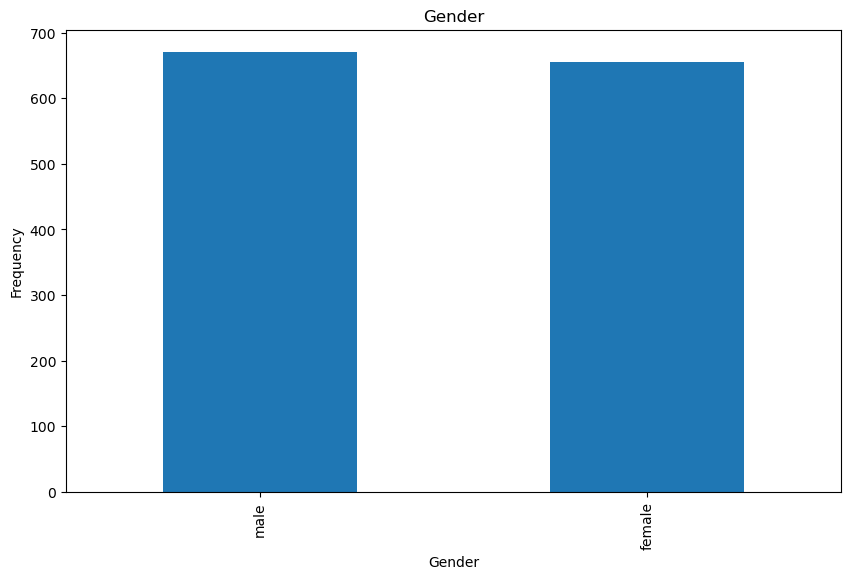

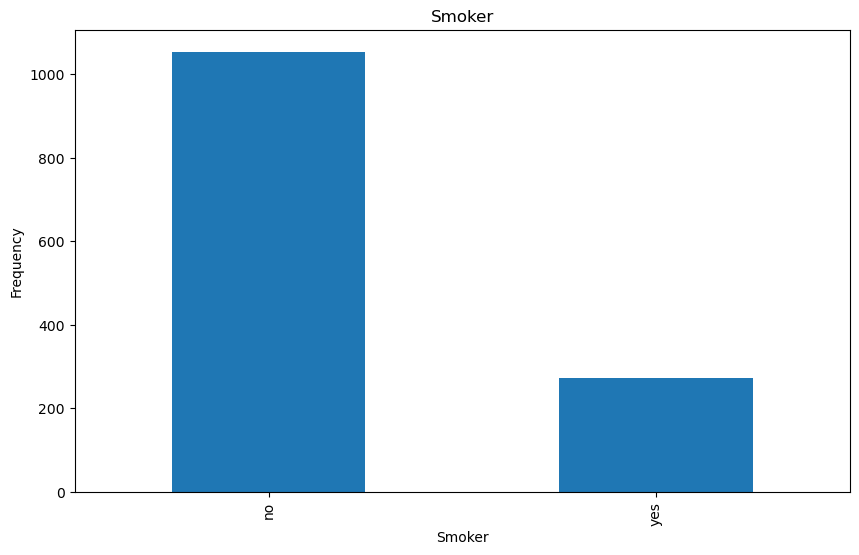

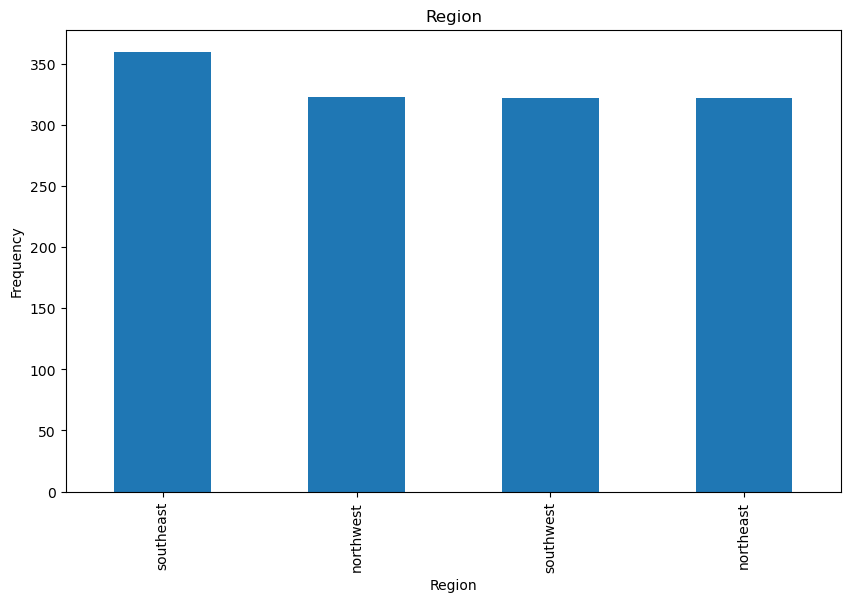

In [14]:
# Bar char for the categorial values 
gender_counts = df.Gender.value_counts()

plt.figure(figsize=(10,6))
gender_counts.plot(kind='bar')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

smoker_counts = df.Smoker.value_counts()

plt.figure(figsize=(10,6))
smoker_counts.plot(kind='bar')
plt.title('Smoker')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()

region_counts = df.Region.value_counts()

plt.figure(figsize=(10,6))
region_counts.plot(kind='bar')
plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

# Descriptive Statistics and Variability Measures 

In [15]:
# Descriptive statistics for numerical columns
print(df.describe())
mode_value = statistics.mode(df['Age'])
mode_value_1 = statistics.mode(df['BMI']) 
mode_value_2 = statistics.mode(df['Children'])
mode_value_3 = statistics.mode(df['Expenses'])

print("\nMode for age:", mode_value)
print("\nMode for BMI:", mode_value_1)
print("\nMode for children:", mode_value_2)
print("\nMode for expenses:", mode_value_3)

               Age          BMI     Children      Expenses
count  1327.000000  1327.000000  1327.000000   1327.000000
mean     39.210649    30.671451     1.131876  13305.559063
std      14.028688     6.079059     3.204908  12126.146653
min      18.000000    16.000000   -65.000000   1121.870000
25%      27.000000    26.300000     0.000000   4729.005000
50%      39.000000    30.400000     1.000000   9391.350000
75%      51.000000    34.600000     2.000000  16786.355000
max      64.000000    53.100000    70.000000  63770.430000

Mode for age: 18.0

Mode for BMI: 33.3

Mode for children: 0

Mode for expenses: 1639.56


In [16]:
# Calculate variability measures 
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']

for col in numerical_columns:
    print(f'--- {col} ---')
    print(f'Variance: {df[col].var()}')
    print(f'Standard Deviation: {df[col].std()}')
    print(f'Range: {df[col].max() - df[col].min()}')

--- Age ---
Variance: 196.8040807890177
Standard Deviation: 14.028687778584912
Range: 46.0
--- BMI ---
Variance: 36.954956779281154
Standard Deviation: 6.0790588728257235
Range: 37.1
--- Children ---
Variance: 10.27143410839497
Standard Deviation: 3.2049078158965774
Range: 135
--- Expenses ---
Variance: 147043432.65739307
Standard Deviation: 12126.146653302238
Range: 62648.56


# Compute Quartiles 

In [17]:
# Determine quartiles for numerical columns
numerical_columns = ['Age', 'BMI', 'Children', 'Expenses']

for col in numerical_columns:
    print(f'--- {col} ---')
    print(f'Q1: {df[col].quantile(0.25)}')
    print(f'Q2: {df[col].quantile(0.50)}')
    print(f'Q3: {df[col].quantile(0.75)}')

--- Age ---
Q1: 27.0
Q2: 39.0
Q3: 51.0
--- BMI ---
Q1: 26.3
Q2: 30.4
Q3: 34.6
--- Children ---
Q1: 0.0
Q2: 1.0
Q3: 2.0
--- Expenses ---
Q1: 4729.005
Q2: 9391.35
Q3: 16786.355


# Probability Distribution Modeling 

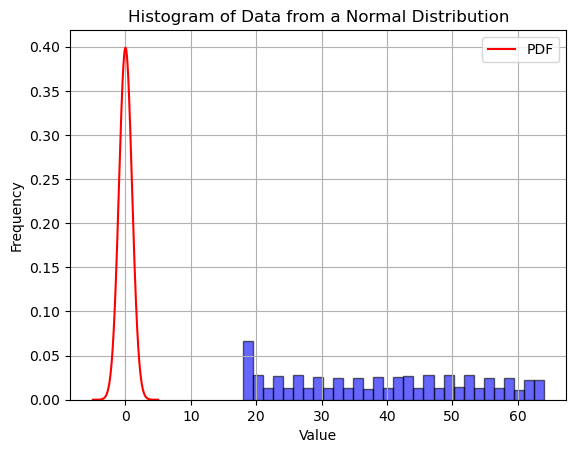

In [18]:
# Probability Distribution Modeling on Age and BMI 
# Age - Normal (Gaussian) Distribution
mu = 0 
sigma = 1 

data = df['Age']

plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data from a Normal Distribution')
plt.grid(True)

x = np.linspace(-5, 5, 1000)
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), color='red', label='PDF')
plt.legend()
plt.show()

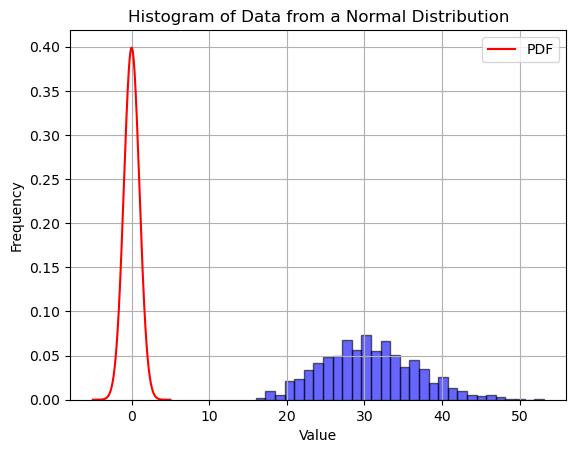

In [19]:
# Probability Distribution Modeling on Age and BMI 
# BMI - Normal (Gaussian) Distribution
mu = 0
sigma = 1

data = df['BMI']

plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data from a Normal Distribution')
plt.grid(True)

x = np.linspace(-5, 5, 1000)
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma), color='red', label='PDF')
plt.legend()
plt.show()

# Feature Scaling

In [20]:
# Convert the categorical values (columns with text data) into numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Smoker'] = le.fit_transform(df.Smoker)

le1 = LabelEncoder()
df['Gender'] = le1.fit_transform(df.Gender)

le2 = LabelEncoder()
df['Region'] = le2.fit_transform(df.Region)

print(df)

       Age  Gender        BMI  Children  Smoker  Region  Expenses
0     19.0       0  27.900000         0       1       3  16884.92
1     18.0       1  33.800000         1       0       2   1725.55
2     28.0       1  33.000000         3       0       2   4449.46
3     33.0       1  22.700000         0       0       1  21984.47
4     32.0       1  28.900000         0       0       1   3866.86
...    ...     ...        ...       ...     ...     ...       ...
1332  52.0       0  44.700000         3       0       3  11411.69
1333  50.0       1  31.000000         3       0       1  10600.55
1335  18.0       0  30.676917         0       0       2   1629.83
1336  21.0       0  25.800000         0       0       3   2007.95
1337  61.0       0  29.100000         0       1       1  29141.36

[1327 rows x 7 columns]


In [21]:
# Assign the customer’s features data to the variable "X” and assign the label feature (expenses) to the variable "y"
X = df.loc[:,['Age','Gender','BMI','Children','Smoker','Region']].values

y = df.loc[:,['Expenses']].values 

print(X)

print(y)

[[19.          0.         27.9         0.          1.          3.        ]
 [18.          1.         33.8         1.          0.          2.        ]
 [28.          1.         33.          3.          0.          2.        ]
 ...
 [18.          0.         30.67691729  0.          0.          2.        ]
 [21.          0.         25.8         0.          0.          3.        ]
 [61.          0.         29.1         0.          1.          1.        ]]
[[16884.92]
 [ 1725.55]
 [ 4449.46]
 ...
 [ 1629.83]
 [ 2007.95]
 [29141.36]]


In [22]:
# Convert the X and Y DataFrames to arrays
data = pd.DataFrame(X)

X = data.to_numpy()

display(X)   

Data = pd.DataFrame(y)

y = Data.to_numpy()

display(y) 

array([[19.        ,  0.        , 27.9       ,  0.        ,  1.        ,
         3.        ],
       [18.        ,  1.        , 33.8       ,  1.        ,  0.        ,
         2.        ],
       [28.        ,  1.        , 33.        ,  3.        ,  0.        ,
         2.        ],
       ...,
       [18.        ,  0.        , 30.67691729,  0.        ,  0.        ,
         2.        ],
       [21.        ,  0.        , 25.8       ,  0.        ,  0.        ,
         3.        ],
       [61.        ,  0.        , 29.1       ,  0.        ,  1.        ,
         1.        ]])

array([[16884.92],
       [ 1725.55],
       [ 4449.46],
       ...,
       [ 1629.83],
       [ 2007.95],
       [29141.36]])

In [23]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

print('Normalized X data is \n',X)
print('\nNormalized y data is \n',y)

Normalized X data is 
 [[-1.44120879e+00 -1.01136831e+00 -4.56073185e-01 -3.53302871e-01
   1.96489335e+00  1.34518506e+00]
 [-1.51251817e+00  9.88759478e-01  5.14837682e-01 -4.11637833e-02
  -5.08933476e-01  4.39981928e-01]
 [-7.99424383e-01  9.88759478e-01  3.83188751e-01  5.83114393e-01
  -5.08933476e-01  4.39981928e-01]
 ...
 [-1.51251817e+00 -1.01136831e+00  8.99556771e-04 -3.53302871e-01
  -5.08933476e-01  4.39981928e-01]
 [-1.29859003e+00 -1.01136831e+00 -8.01651629e-01 -3.53302871e-01
  -5.08933476e-01  1.34518506e+00]
 [ 1.55378510e+00 -1.01136831e+00 -2.58599788e-01 -3.53302871e-01
   1.96489335e+00 -4.65221201e-01]]

Normalized y data is 
 [[ 0.29528839]
 [-0.95532201]
 [-0.73060619]
 ...
 [-0.96321867]
 [-0.93202471]
 [ 1.30641427]]


# Linear Regression Modeling 

In [24]:
# Using the train_test_split function, split the data into a training data set, and a test data set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

print("X_train=", X_train)
print("X_test=", X_test)
print("y_train=", y_train)
print("y_test=", y_test)

X_train= [[-0.79942438 -1.01136831  0.67939885 -0.35330287 -0.50893348 -0.4652212 ]
 [ 0.98331007 -1.01136831  1.22245069  0.58311439 -0.50893348  0.43998193]
 [ 0.76938194 -1.01136831  2.30855437 -0.35330287 -0.50893348 -1.37042433]
 ...
 [-0.79942438 -1.01136831 -0.68645881  0.2709753  -0.50893348  0.43998193]
 [ 1.5537851  -1.01136831  0.94269671 -0.04116378  1.96489335 -1.37042433]
 [-0.51418687  0.98875948  0.74522331  0.2709753  -0.50893348  1.34518506]]
X_test= [[ 0.5554538  -1.01136831 -0.50544153  0.2709753   1.96489335 -0.4652212 ]
 [-1.51251817 -1.01136831 -0.91684444 -0.35330287 -0.50893348 -1.37042433]
 [ 0.05628816  0.98875948  0.35027652 -0.04116378  1.96489335 -1.37042433]
 ...
 [ 0.98331007 -1.01136831  1.10725787 -0.04116378 -0.50893348 -0.4652212 ]
 [-1.51251817  0.98875948 -1.21305454 -0.04116378 -0.50893348  0.43998193]
 [ 0.19890691 -1.01136831  1.18953845 -0.35330287 -0.50893348  1.34518506]]
y_train= [[-8.04238527e-01]
 [ 5.90471113e-01]
 [-3.10509031e-01]
 [-1.

In [25]:
#11 Import LinearRegression from sklearn.linear_model and create an instance of a LinearRegression() model named.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [26]:
#12 Fit the model to the training data
# lm.fit(X_train.values.reshape(-1,1),y_train.values.respahe(-1,1))
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
#13 Print the linear model's intercept and coefficients
print("Intercept:", lm.intercept_)
print('Coefficient:', lm.coef_)

Intercept: [0.0029574]
Coefficient: [[ 0.30028139 -0.01313454  0.1631013   0.0223312   0.79106994 -0.0352297 ]]


# Prediction and Model Evaluation  

In [28]:
#14 Use the trained model to predict the test data set
predictions = lm.predict(X_test)
lm.score(X_test, y_test)

0.7662132917762294

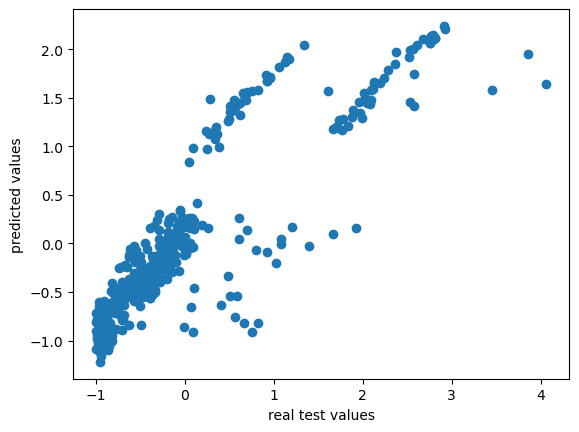

In [29]:
#15 Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('real test values')
plt.ylabel('predicted values')
plt.show()

In [30]:
#16 Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error is: ',RMSE)

MSE = mean_squared_error(y_test, predictions)
print('Mean Squared Error is: ',MSE)

MAE = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error is: ',MAE)

Root Mean Squared Error is:  0.49755745758104397
Mean Squared Error is:  0.24756342359451236
Mean Absolute Error is:  0.3404619475344819


## DUE DATE: Thursday, December 7, 2023